# Business Problem:

The project to have some insights on the movies dataset provided, what are the most 5 trending movies, which language is the most used inthe movies in the dataset, the effect of year of release on the ratings and the popularity of the movie.

# Data Understanding:


The dataset is representing the movies released between years 1930-2020, It contains many features as the language of the movie, its original title, its popularity, its release date, its english meaning of the title if its language is other than english, the average rating that the movie got is named as vote average, the total number of ratings is named as vote count.

Data of features are different such that the title & original title are string type, release date is timeseries, original language, genre ids, vote average are categorical type, popularity & vote count are numerical data type.

In [4]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading the csv file by pandas
df=pd.read_csv('data/zippedData/tmdb.movies.csv.gz',usecols=['genre_ids','id','original_language','original_title','popularity','release_date','title',
                                          'vote_average','vote_count'])

In [6]:
# Let's see the dataframe
df.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
# Let's have some info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [8]:
#let's check the shape of dataframe
len(df)

26517

# Data Preparation:

We have checked if there are missing values or not but we found that there is no missing values for any feature.
We checked whether if there is any duplicated data (rows) or not, We found that there is 1020 data duplicated which we removed them to clean the dataframe. 

Transform the column of release date to be in a timeseries type, Also construct a new column named year from release date column to show the year of release separately.

In [9]:
# Let's check duplicated data
df.duplicated().sum()

1020

We found 1020 rows are duplicated, we will remove them.

In [10]:
df=df.drop_duplicates()
len(df)

25497

In [11]:
df['release_date']=pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          25497 non-null  object        
 1   id                 25497 non-null  int64         
 2   original_language  25497 non-null  object        
 3   original_title     25497 non-null  object        
 4   popularity         25497 non-null  float64       
 5   release_date       25497 non-null  datetime64[ns]
 6   title              25497 non-null  object        
 7   vote_average       25497 non-null  float64       
 8   vote_count         25497 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.9+ MB


In [12]:
# Construct a new column for release date to be in years
df['year']=pd.DatetimeIndex(df['release_date']).year

In [13]:
df.head(1)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010


In [14]:
# Slicing dataframe to be for years after 2000
df_after_2000=df[df['year']>=2000]

In [15]:
df_after_2000.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2010


# Data Modeling:

We will have some visualizations and insights on the dataset for different features to get dependencies and correlations between features, we used matplotlib graphs, pandas functions to plot some charts to answer these questions and relations also checked the most trending and popular movies that got higher watching and the reasons for this.

We could see here that the are no null values in the dataframe.
Let's have some insights

In [16]:
# Let's check the unique languages we have in our dataframe
df_after_2000['original_language'].unique()

array(['en', 'nl', 'es', 'ja', 'sv', 'de', 'fr', 'cn', 'it', 'ru', 'zh',
       'hi', 'no', 'ko', 'da', 'fi', 'pl', 'te', 'hu', 'tr', 'pt', 'he',
       'fa', 'th', 'cs', 'et', 'tl', 'lt', 'xx', 'bs', 'ar', 'is', 'el',
       'mr', 'hr', 'ro', 'sr', 'uk', 'nb', 'hz', 'ca', 'bg', 'sl', 'lv',
       'si', 'ab', 'ta', 'bo', 'id', 'sq', 'bn', 'gu', 'lo', 'ne', 'kk',
       'hy', 'ps', 'kn', 'vi', 'ku', 'ka', 'ml', 'ur', 'mi', 'eu', 'sn',
       'cy', 'ha', 'ky', 'yi', 'pa', 'xh', 'cr', 'sw', 'af', 'dz'],
      dtype=object)

In [17]:
# Let's check what are the most lanaguages of movies
df_after_2000['original_language'].value_counts().sort_values(ascending=False)

en    22300
fr      482
es      439
ru      294
ja      240
      ...  
xh        1
ps        1
sn        1
sl        1
hz        1
Name: original_language, Length: 76, dtype: int64

In [18]:
from matplotlib.colors import ListedColormap

colors_list=ListedColormap(['#7FBA00','#00A4EF','#F25022','#FFB900','#737373'])

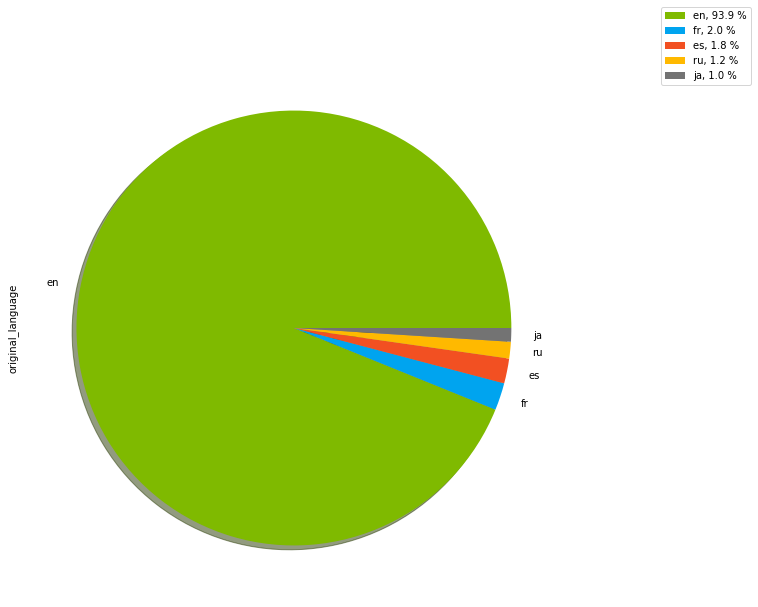

In [19]:
df_languages_count=df_after_2000['original_language'].value_counts().sort_values(ascending=False)[:5]


# Let's visualize the the number of languages using pie chart

fig1, ax1 = plt.subplots(figsize=(15,10))
df_languages_count.plot(kind='pie',subplots=True,shadow=True, colormap=colors_list)
percents = df_languages_count.to_numpy() * 100 / df_languages_count.to_numpy().sum()
plt.legend( bbox_to_anchor=(1.35,1.1), loc='upper right',
            labels=['%s, %1.1f %%' % (l, s) for l, s in zip(df_languages_count.index,percents)])

plt.show()

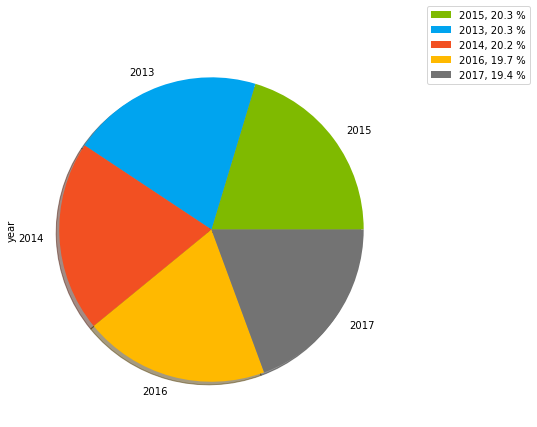

In [20]:
# Let's check what is year of the most movies in the dataset
df_year_counts=df_after_2000['year'].value_counts().sort_values(ascending=False)[:5]


fig1, ax1 = plt.subplots(figsize=(10,7))
df_year_counts.plot(kind='pie',subplots=False,shadow=True,colormap=colors_list)
percents = df_year_counts.to_numpy() * 100 / df_year_counts.to_numpy().sum()
plt.legend( bbox_to_anchor=(1.35,1.1), loc='upper right',
            labels=['%s, %1.1f %%' % (l, s) for l, s in zip(df_year_counts.index,percents)])

plt.show()

In [21]:
df_after_2000.groupby('year')['vote_count'].sum().sort_values(ascending=False)

year
2016    577981
2014    576557
2015    535120
2013    528332
2017    521098
2012    452952
2011    419298
2010    393151
2018    366992
2009     20822
2004     18628
2002     16050
2007      4523
2008      3487
2019      3227
2000      2854
2006      1507
2005      1468
2003       961
2001       705
2020         1
Name: vote_count, dtype: int64

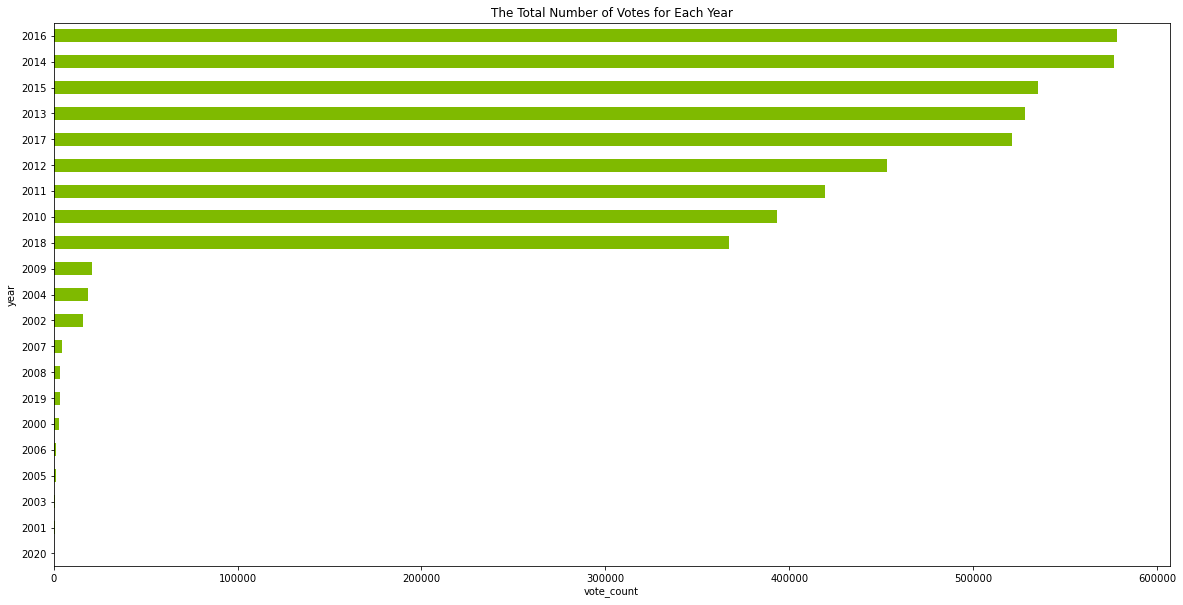

In [23]:
# Check the total number of votes for each year
df_year_vote_count=df_after_2000.groupby('year')['vote_count'].sum().sort_values(ascending=True)

fig1, ax1 = plt.subplots(figsize=(20,10))

df_year_vote_count.plot(kind='barh',colormap=colors_list)
ax1.set_xlabel('vote_count')
ax1.set_title('The Total Number of Votes for Each Year')

plt.show()

Here we can see that year 2016 has the most hight vote counts

In [20]:
df_after_2000.groupby('year')['vote_average'].mean().sort_values(ascending=False)

year
2002    7.220000
2004    6.890000
2000    6.760000
2007    6.711111
2003    6.675000
2006    6.555556
2008    6.546154
2017    6.261383
2018    6.233774
2001    6.100000
2016    6.091178
2015    6.050750
2019    6.017460
2014    5.950393
2009    5.884615
2013    5.811807
2011    5.794329
2010    5.775345
2012    5.771969
2005    5.366667
2020    0.000000
Name: vote_average, dtype: float64

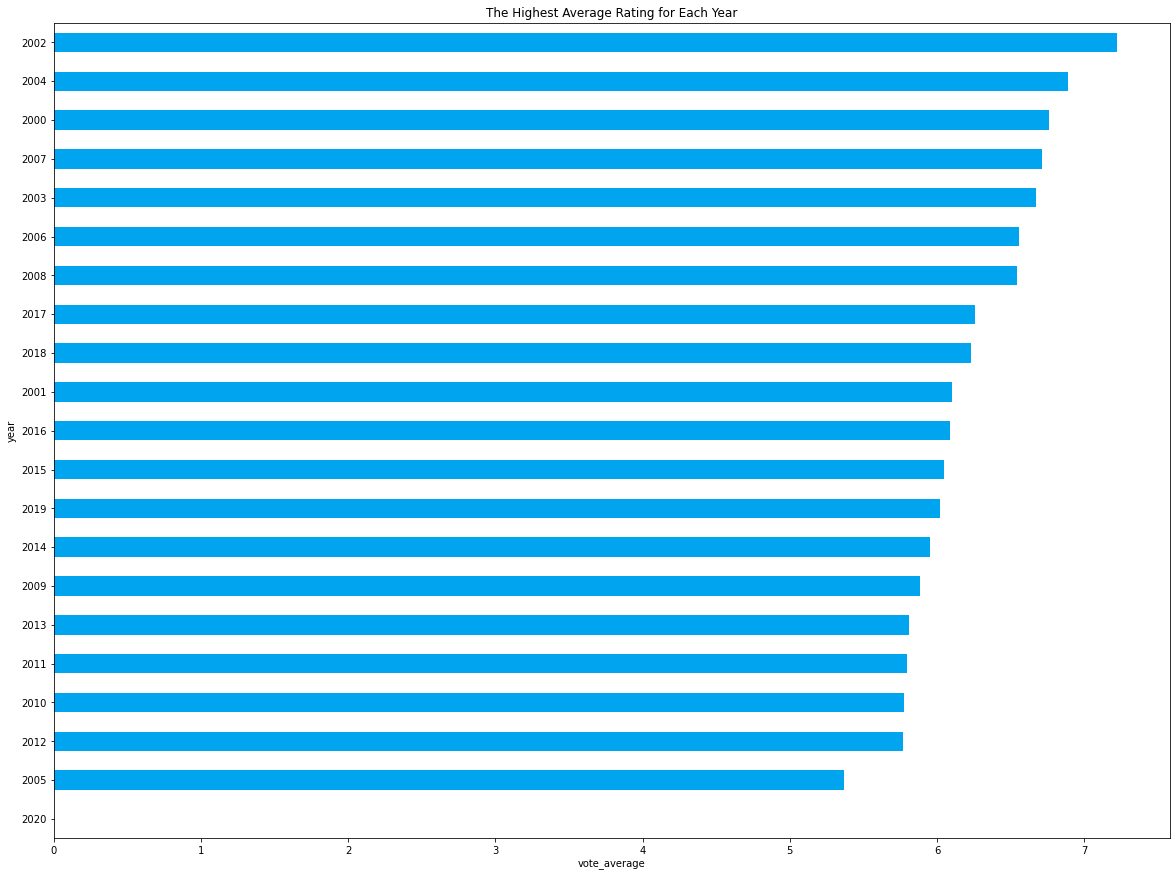

In [24]:
# Check the highest average rating for each year
df_year_vote_avg=df_after_2000.groupby('year')['vote_average'].mean().sort_values(ascending=True)

fig1, ax1 = plt.subplots(figsize=(20,15))

df_year_vote_avg.plot(kind='barh',color='#00A4EF')
ax1.set_xlabel('vote_average')
ax1.set_title('The Highest Average Rating for Each Year')
plt.show()

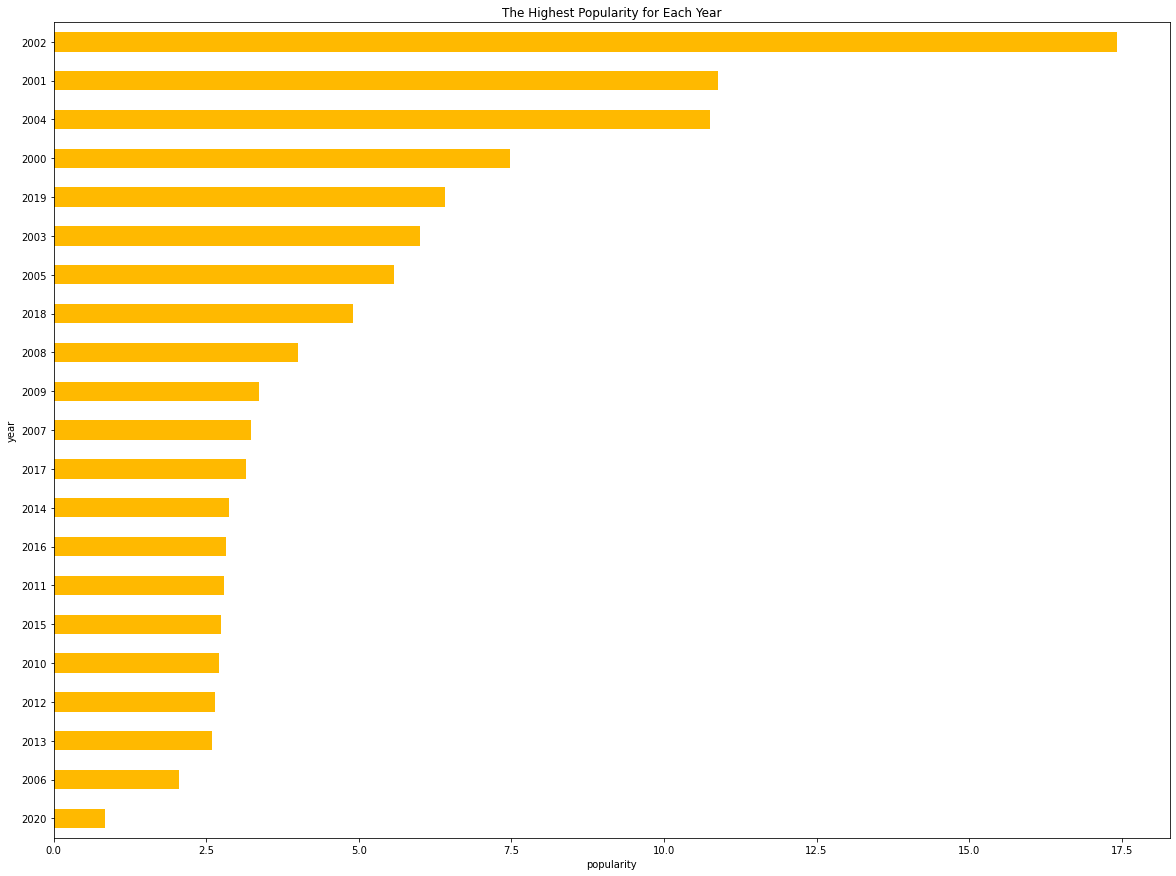

In [25]:
# Check the highest popularity for each year
df_year_popularity_avg=df_after_2000.groupby('year')['popularity'].mean().sort_values(ascending=True)

fig1, ax1 = plt.subplots(figsize=(20,15))

df_year_popularity_avg.plot(kind='barh',color='#FFB900')
ax1.set_xlabel('popularity')
ax1.set_title('The Highest Popularity for Each Year')

plt.show()

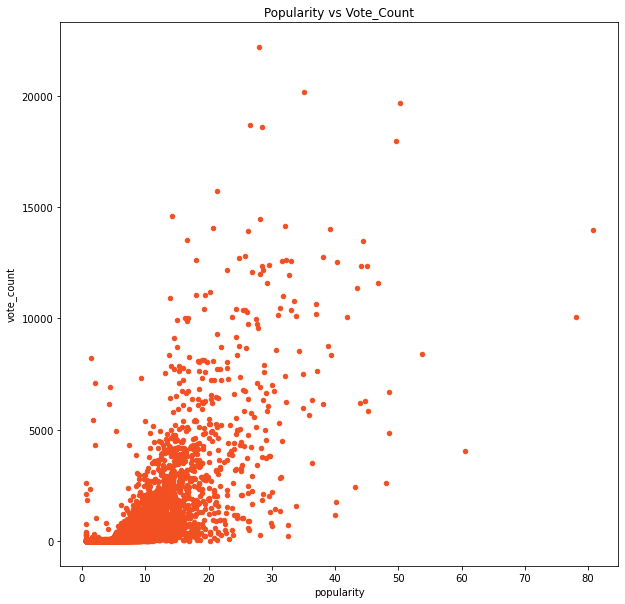

In [26]:
fig1, ax1 = plt.subplots(figsize=(10,10))

df_after_2000.plot.scatter(x='popularity',y='vote_count',ax=ax1, color='#F25022')
ax1.set_title('Popularity vs Vote_Count')
plt.show()

In [24]:
# Check the most 5 popular movies after 2000
df_after_2000.sort_values(by='popularity', ascending=False)['title'][:5]

23811                       Avengers: Infinity War
11019                                    John Wick
23812            Spider-Man: Into the Spider-Verse
11020    The Hobbit: The Battle of the Five Armies
5179                                  The Avengers
Name: title, dtype: object

In [25]:
# Check the most 5 popular movies in year 2016
df_after_2000[df_after_2000['year']==2016].sort_values(by='popularity', ascending=False)['title'][:5]

17381             X-Men: Apocalypse
17382    Captain America: Civil War
17383                      Deadpool
17384                Doctor Strange
17387      The Light Between Oceans
Name: title, dtype: object

In [26]:
# Check the most 5  high rated movies after year 2000
df_after_2000.sort_values(by='vote_average', ascending=False)['title'][:5]

19850                                            Cyclical
19740           Making a Killing: Guns, Greed and the NRA
19716            True Legends – Episode 2: The UnHoly See
19717                                         Le Clitoris
19718    UNCOUNTED - The Story of the California Election
Name: title, dtype: object

# Conclusions :

We recommend to get more details about the duration of the movies, its genre type, its actors, its director as these factors may be the reasons of the movies that are most popular, most trending and that get high count of watchings.

These features needs to be known for mainly the movies release in 2016, 2002 as they will help in the next producing movies to be more popular and get high number of viewers.